In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [61]:
pd.set_option('display.max_columns',None)

In [48]:
df = pd.read_csv('data/final_cleaned_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,...,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
0,R_UEENeM2ghM5uKK5,Male,24,">150,000",4-6,4,5,1,1,2,...,4,5,3,0,In-Store Ads,Per Unit,Refreshment,4.0,7,Matcha
1,R_AzdTD7ACCdSVCTv,Male,23,"50,000-100,000",1-3,2,1,5,3,4,...,1,0,1,3,Word of Mouth,Bulk,Refreshment,0.0,0,Rooibos
2,R_2642Y0EiU2ABVzi,Male,24,"100,000-150,000",1-3,2,3,4,1,4,...,3,4,4,4,Word of Mouth,Per Unit,Refreshment,2.0,8,Matcha
3,R_1ONMulo6dpFaq04,Male,26,"<50,000",0,2,4,1,5,2,...,1,5,5,1,Instagram,Per Unit,Increased Focus,6.0,7,Matcha
4,R_1lo8HoT9csBWOxP,Female,24,"100,000-150,000",1-3,2,3,1,2,3,...,1,5,5,3,Word of Mouth,Per Unit,Increased Focus,6.5,7,Matcha


# Forward Selection Automation with Motto_Likelihood as Dependent Variable

In [49]:
list = 'Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor'
list = list.split(' + ')

In [50]:
largest = [0, '']

for i in list:
    res = smf.ols(f'Motto_Likelihood ~ {i}', data=df).fit()
    if res.rsquared_adj > largest[0]:
        largest = [res.rsquared_adj, i]

largest


[0.16579983766525153, 'C(Ingredients_Quality)']

In [51]:
fsmodel = 'Motto_Likelihood ~ C(Ingredients_Quality)'

for x in range(len(list)):
    for i in list:
        res = smf.ols(f'{fsmodel} + {i}', data=df).fit()
        if res.rsquared_adj > largest[0]:
            largest = [res.rsquared_adj, i]
    
    print(largest)
    
    if fsmodel.split(' + ')[-1] == largest[1]:
        break

    fsmodel = f'{fsmodel} + {largest[1]}'

[0.25087079592634165, 'C(Caffeine_Content)']
[0.3183261427263574, 'C(Price)']
[0.3461255809701361, 'Platforms']
[0.3643750539206917, 'Purpose']
[0.3871793976099588, 'Purchase_Location']
[0.4057764081949401, 'C(Alcohol)']
[0.41142661965109717, 'C(EnergyDrink)']
[0.41877929044542417, 'Age']
[0.41877929044542417, 'Age']


In [52]:
fsmodel

'Motto_Likelihood ~ C(Ingredients_Quality) + C(Caffeine_Content) + C(Price) + Platforms + Purpose + Purchase_Location + C(Alcohol) + C(EnergyDrink) + Age'

In [53]:
reg = smf.ols(fsmodel, data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Motto_Likelihood   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     3.274
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.89e-05
Time:                        13:37:35   Log-Likelihood:                -193.15
No. Observations:                 102   AIC:                             452.3
Df Residuals:                      69   BIC:                             538.9
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  7.9342      3.242      2.447      0.017       1.466      14.402
C(Ingredients_Quality)[T.1]                2.0287      1.152      1.761      0.083      -0.269       4.327
C(Ingredients_Quality)[T.3]                2.0134      1.166      1.726      0.089      -0.313       4.340
C(Ingredients_Quality)[T.4]                3.7974      1.165      3.260      0.002       1.474       6.121
C(Ingredients_Quality)[T.5]                3.7146      1.196      3.106      0.003       1.328       6.101
C(Caffeine_Content)[T.1]                  -2.4615      0.906     -2.716      0.008      -4.269      -0.654
C(Caffeine_Content)[T.3]                  -1.1276      0.772     -1.460      0.149      -2.668       0.413
C(Caffeine_Content)[T.4]                   0.4511      0.785      0.575      0.567      -1.114       2.016
C(Caffeine_Content)[T.5]                  -0.7627      0.901     -0.846      0.400      -2.561       1.035
C(Price)[T.1]                             -1.1041      1.334     -0.828      0.411      -3.765       1.557
C(Price)[T.3]                              0.0931      1.255      0.074      0.941      -2.410       2.596
C(Price)[T.4]                              1.0843      1.291      0.840      0.404      -1.492       3.660
C(Price)[T.5]                              1.0125      1.340      0.756      0.452      -1.661       3.686
Platforms[T.Instagram]                     1.6848      1.022      1.649      0.104      -0.353       3.723
Platforms[T.TikTok]                        1.4667      0.922      1.591      0.116      -0.372       3.306
Platforms[T.Web Ads]                       6.6603      2.113      3.152      0.002       2.445      10.875
Platforms[T.Word of Mouth]                 0.2827      0.757      0.373      0.710      -1.228       1.793
Purpose[T.Dining Compliments]             -1.2906      2.397     -0.538      0.592      -6.073       3.491
Purpose[T.Energy Boost]                   -2.2665      2.280     -0.994      0.324      -6.816       2.283
Purpose[T.Increased Focus]                 0.4307      2.303      0.187      0.852      -4.163       5.025
Purpose[T.Refreshment]                    -0.8324      2.252     -0.370      0.713      -5.325       3.660
Purchase_Location[T.Online]               -2.1114      1.297     -1.627      0.108      -4.700       0.477
Purchase_Location[T.Restaurants/Cafes]    -1.1412      0.567     -2.012      0.048      -2.273      -0.010
Purchase_Location[T.Supermarkets]         -1.2722      0.675     -1.884      0.064      -2.619       0.075
C(Alcohol)[T.2]                           -1.3394      0.720     -1.859      0.067      -2.777       0.098
C(Alcohol)[T.3]                           -1.6464      0.677     -2.430      0.018     

In [81]:
from statsmodels.iolib.summary2 import summary_col

summ = summary_col(reg)

In [83]:
summ.tables[0].T.to_csv('forecast.csv')

#### Forward Selection Model has a higher adjusted R-Squared for Motto_Likelihood

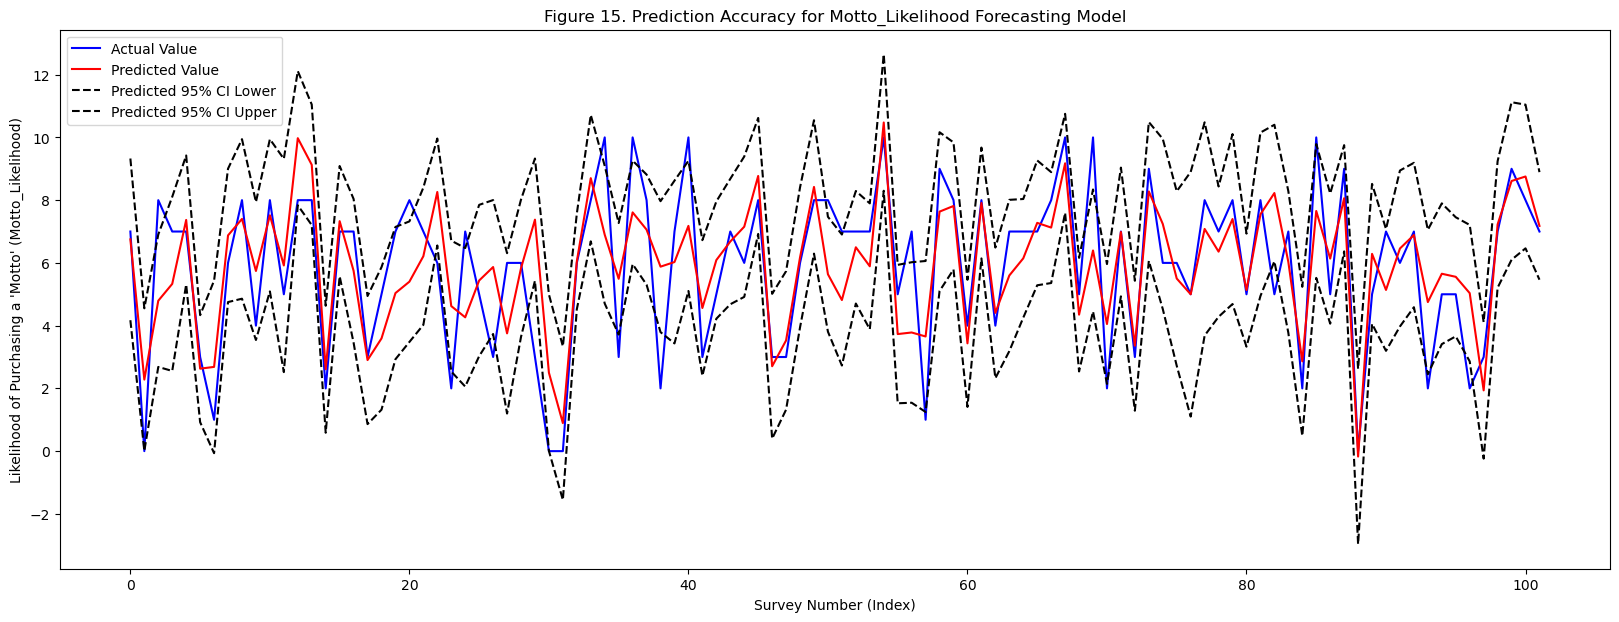

In [79]:
pred = reg.get_prediction(df).summary_frame()

y_hat = pred['mean']
y_lb = pred['mean_ci_lower']
y_ub = pred['mean_ci_upper']

plt.figure(figsize=(20,7))
df.Motto_Likelihood.plot(color='blue', label='Actual Value')
y_hat.plot(color='red', label='Predicted Value')
y_lb.plot(color='black', linestyle='dashed', label='Predicted 95% CI Lower')
y_ub.plot(color='black', linestyle='dashed', label='Predicted 95% CI Upper')
plt.legend()
plt.title('Figure 15. Prediction Accuracy for Motto_Likelihood Forecasting Model')
plt.xlabel('Survey Number (Index)')
plt.ylabel("Likelihood of Purchasing a 'Motto' (Motto_Likelihood)")
plt.show()

---

# Forward Selection Automation with Motto_Price as Dependent Variable

In [55]:
list2 = 'Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Likelihood + Motto_Flavor'
list2 = list2.split(' + ')

In [56]:
largest2 = [0, '']

for i in list2:
    res = smf.ols(f'Motto_Price ~ {i}', data=df).fit()
    if res.rsquared_adj > largest2[0]:
        largest2 = [res.rsquared_adj, i]

largest2

[0.2858995339886682, 'Purpose']

In [57]:
fsmodel2 = 'Motto_Price ~ Purpose'

for x in range(len(list2)):
    for i in list2:
        res = smf.ols(f'{fsmodel2} + {i}', data=df).fit()
        if res.rsquared_adj > largest2[0]:
            largest2 = [res.rsquared_adj, i]
    
    print(largest2)
    
    if fsmodel2.split(' + ')[-1] == largest2[1]:
        break

    fsmodel2 = f'{fsmodel2} + {largest2[1]}'

[0.3449414628185432, 'C(Juice)']
[0.36976616302096355, 'Purchase_Location']
[0.3807503569015672, 'Exercise']
[0.3953721099786347, 'C(Ingredients_Quality)']
[0.4186376036340901, 'C(Brand_Reputation)']
[0.4473873954717331, 'Age']
[0.4610504728208076, 'Income']
[0.4831175223549904, 'C(Tea)']
[0.502931033460676, 'C(Health_Benefit)']
[0.5365394003699275, 'C(Taste)']
[0.5561782059558431, 'C(EnergyDrink)']
[0.5813689398777326, 'C(Alcohol)']
[0.6112040563375265, 'C(Soda)']
[0.6135161392309127, 'C(Caffeine_Content)']
[0.6199076493539797, 'C(Milk)']
[0.6204417781480343, 'C(SparklingWater)']
[0.6204417781480343, 'C(SparklingWater)']


In [58]:
fsmodel2

'Motto_Price ~ Purpose + C(Juice) + Purchase_Location + Exercise + C(Ingredients_Quality) + C(Brand_Reputation) + Age + Income + C(Tea) + C(Health_Benefit) + C(Taste) + C(EnergyDrink) + C(Alcohol) + C(Soda) + C(Caffeine_Content) + C(Milk) + C(SparklingWater)'

In [59]:
reg2 = smf.ols(fsmodel2, data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Motto_Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3.707
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.37e-05
Time:                        13:37:44   Log-Likelihood:                -97.312
No. Observations:                 102   AIC:                             318.6
Df Residuals:                      40   BIC:                             481.4
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 17.8665      2.702      6.612      0.000      12.405      23.328
Purpose[T.Dining Compliments]            -13.6045      1.583     -8.597      0.000     -16.803     -10.406
Purpose[T.Energy Boost]                   -9.8648      1.468     -6.722      0.000     -12.831      -6.899
Purpose[T.Increased Focus]                -9.8724      1.550     -6.367      0.000     -13.006      -6.739
Purpose[T.Refreshment]                   -10.0430      1.473     -6.819      0.000     -13.020      -7.066
C(Juice)[T.2]                              0.2765      0.648      0.427      0.672      -1.033       1.586
C(Juice)[T.3]                              0.5789      0.630      0.918      0.364      -0.695       1.853
C(Juice)[T.4]                             -0.2930      0.563     -0.521      0.605      -1.430       0.844
C(Juice)[T.5]                             -1.3691      0.652     -2.100      0.042      -2.687      -0.051
Purchase_Location[T.Online]                0.8850      0.772      1.146      0.259      -0.676       2.446
Purchase_Location[T.Restaurants/Cafes]    -0.2546      0.354     -0.720      0.476      -0.969       0.460
Purchase_Location[T.Supermarkets]         -0.2255      0.555     -0.406      0.687      -1.347       0.896
Exercise[T.1-3]                           -0.8224      0.423     -1.945      0.059      -1.677       0.032
Exercise[T.4-6]                           -1.0984      0.448     -2.451      0.019      -2.004      -0.193
Exercise[T.7+]                            -2.6180      1.097     -2.386      0.022      -4.836      -0.400
C(Ingredients_Quality)[T.1]               -1.0000      1.130     -0.885      0.381      -3.283       1.283
C(Ingredients_Quality)[T.3]                0.3388      1.090      0.311      0.758      -1.864       2.542
C(Ingredients_Quality)[T.4]                0.5117      1.117      0.458      0.649      -1.747       2.770
C(Ingredients_Quality)[T.5]                0.5845      1.193      0.490      0.627      -1.826       2.995
C(Brand_Reputation)[T.1]                  -3.0611      0.961     -3.186      0.003      -5.003      -1.119
C(Brand_Reputation)[T.3]                  -3.8129      0.984     -3.873      0.000      -5.803      -1.823
C(Brand_Reputation)[T.4]                  -3.3182      1.017     -3.263      0.002      -5.374      -1.263
C(Brand_Reputation)[T.5]                  -3.0909      1.197     -2.582      0.014      -5.511      -0.671
Income[T.50,000-100,000]                  -1.2835      0.502     -2.556      0.015      -2.299      -0.268
Income[T.<50,000]                         -1.5483      0.464     -3.335      0.002      -2.487      -0.610
Income[T.>150,000]                        -1.5780      0.467     -3.382      0.002     

#### Forward Selection Model has a higher adjusted R-Squared for Motto_Price

In [71]:
pred2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.760394,0.762033,1.220268,4.300519,0.214321,5.306467
1,0.320526,0.858351,-1.414266,2.055318,-2.347808,2.988860
2,1.861818,0.791859,0.261412,3.462225,-0.721165,4.444801
3,4.626429,0.815341,2.978564,6.274293,2.013775,7.239083
4,6.651267,0.832295,4.969137,8.333397,4.016867,9.285667
...,...,...,...,...,...,...
97,4.641691,0.751846,3.122153,6.161230,2.108019,7.175364
98,3.103897,0.793087,1.501009,4.706784,0.519375,5.688418
99,4.028978,0.686865,2.640771,5.417185,1.571821,6.486135
100,3.625459,0.802510,2.003525,5.247392,1.029082,6.221835


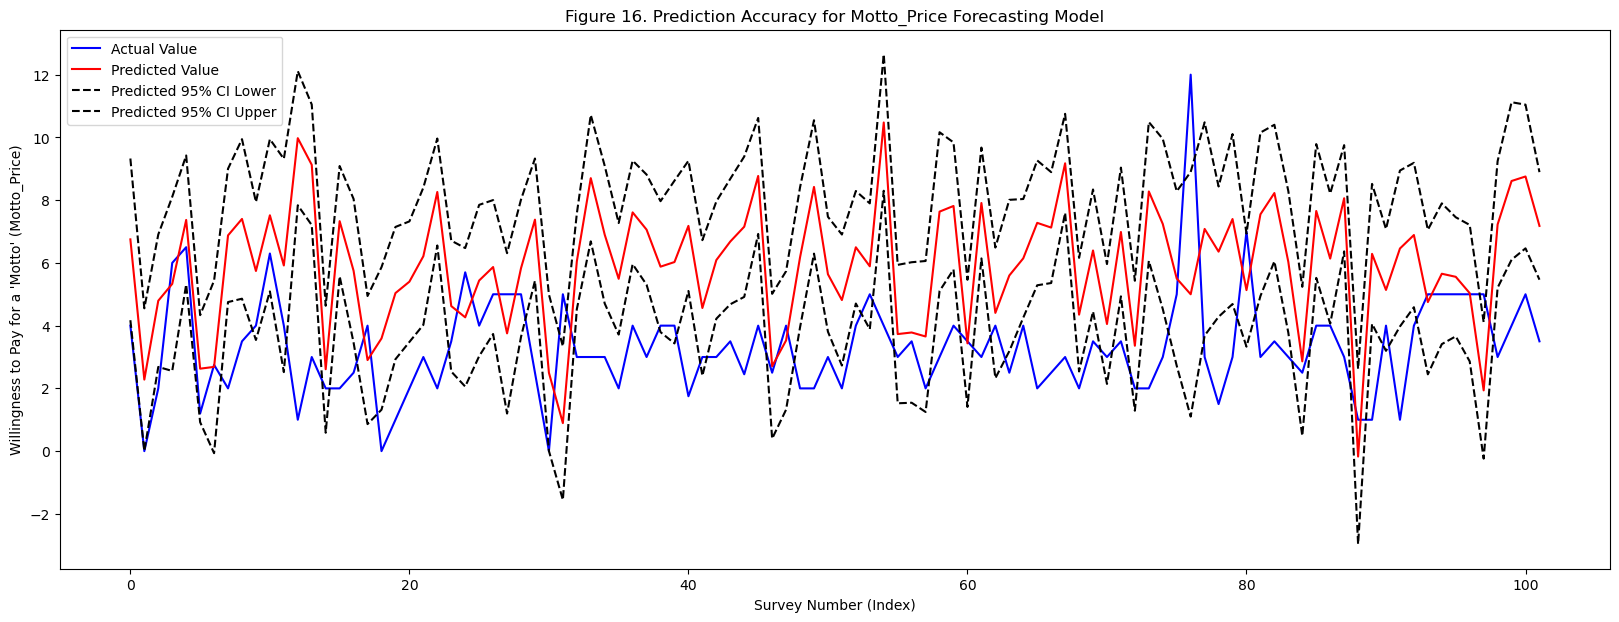

In [80]:
pred2 = reg2.get_prediction(df).summary_frame()

y_hat2 = pred['mean']
y_lb2 = pred['mean_ci_lower']
y_ub2 = pred['mean_ci_upper']

plt.figure(figsize=(20,7))
df.Motto_Price.plot(color='blue', label='Actual Value')
y_hat2.plot(color='red', label='Predicted Value')
y_lb2.plot(color='black', linestyle='dashed', label='Predicted 95% CI Lower')
y_ub2.plot(color='black', linestyle='dashed', label='Predicted 95% CI Upper')
plt.legend()
plt.title('Figure 16. Prediction Accuracy for Motto_Price Forecasting Model')
plt.xlabel('Survey Number (Index)')
plt.ylabel("Willingness to Pay for a 'Motto' (Motto_Price)")
plt.show()